In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataframe has no null values

In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Extracting categorical variables

In [7]:
categorical = []
numerical = []
for col in insurance_df.columns:
    if insurance_df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [8]:
categorical

['sex', 'smoker', 'region']

In [9]:
numerical.remove('charges')

In [10]:
numerical

['age', 'bmi', 'children']

In [11]:
for cat in categorical:
    print(cat)
    print('----')
    print(insurance_df[cat].value_counts())
    print()

sex
----
male      676
female    662
Name: sex, dtype: int64

smoker
----
no     1064
yes     274
Name: smoker, dtype: int64

region
----
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



The categorical variables have few categories making it possible to encode all the categories without losing information

In [12]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


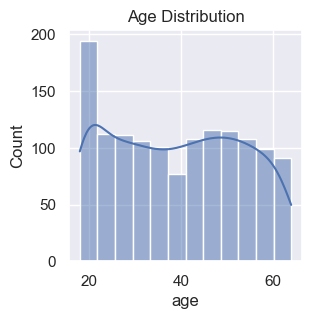

In [13]:
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(insurance_df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

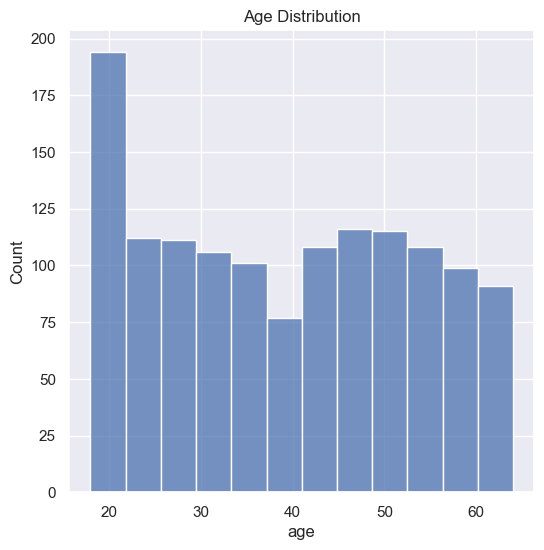

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'BMI Distribution')

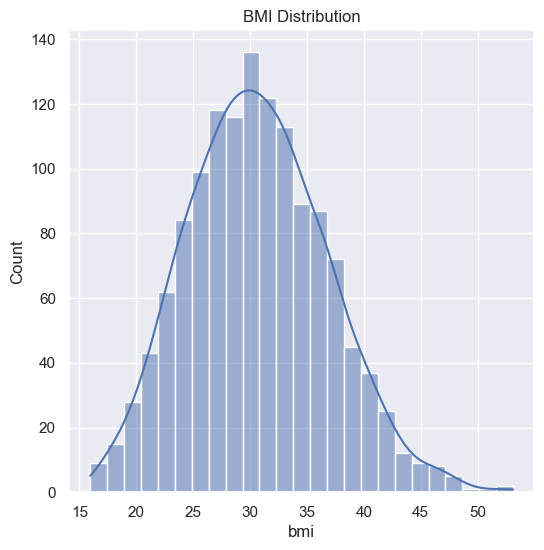

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['bmi'],kde=True)
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Number of Children')

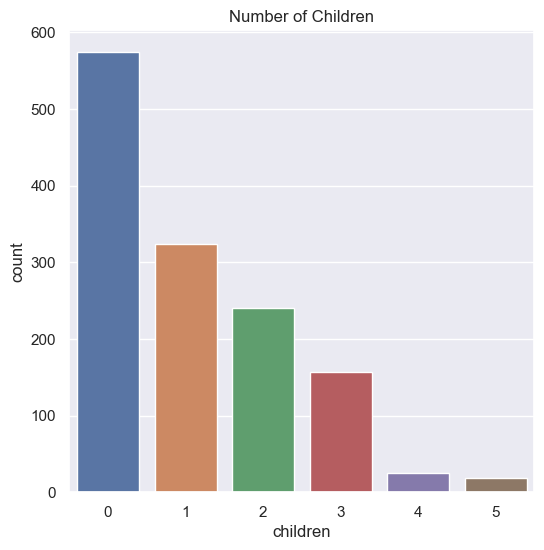

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_df)
plt.title('Number of Children')

In [17]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker')

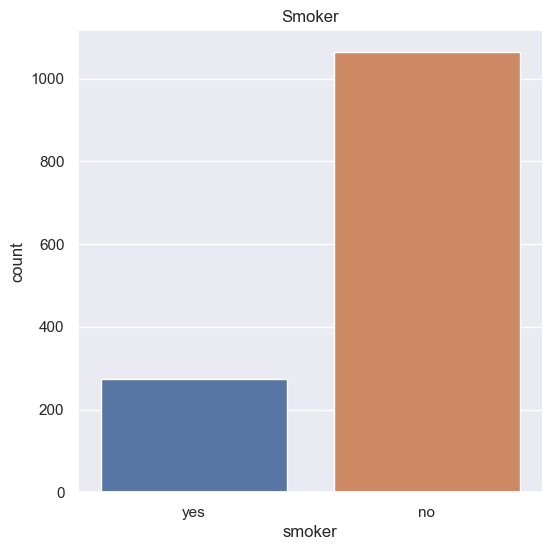

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_df)
plt.title('Smoker')

In [19]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Regions')

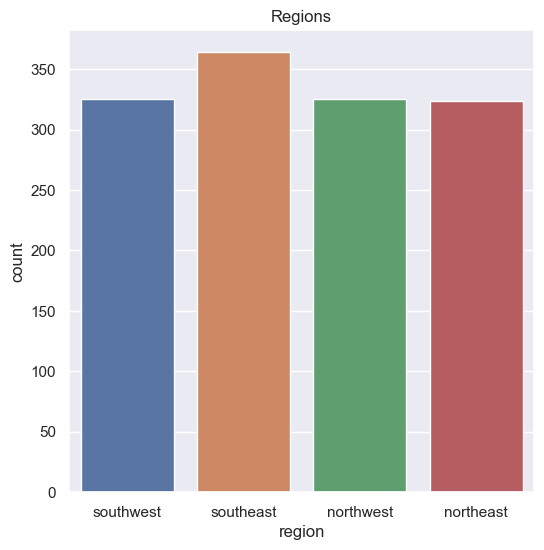

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_df)
plt.title('Regions')

In [21]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Charge Distribution')

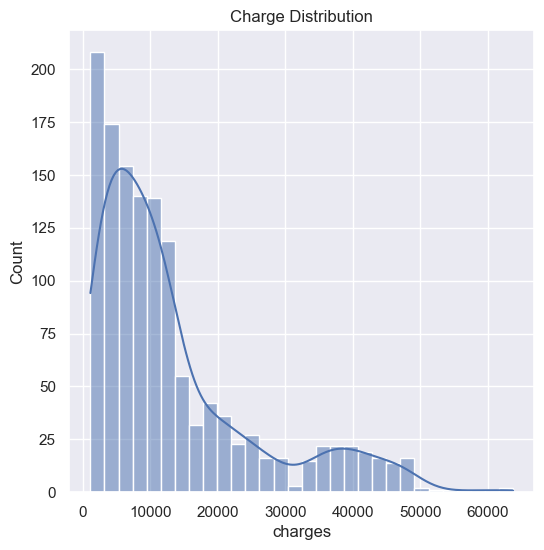

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_df['charges'],kde=True)
plt.title('Charge Distribution')

Data Preprocessing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = insurance_df.drop(columns=['charges'])

In [25]:
y = insurance_df['charges']

In [26]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [29]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
num_pipeline = Pipeline(
    steps=[('scaler',StandardScaler(with_mean=False))]
)

In [31]:
cat_pipeline = Pipeline(
        steps=[('ohe',OneHotEncoder()),
              ('scaler',StandardScaler(with_mean=False))]
)

In [32]:
preprocessor = ColumnTransformer(
    [('num_pipeline',num_pipeline,numerical),
    ('cat_pipeline',cat_pipeline,categorical)]
)

In [33]:
x_train_df = pd.DataFrame(preprocessor.fit_transform(x_train))

In [34]:
x_test_df = pd.DataFrame(preprocessor.transform(x_test))

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [36]:
from sklearn.metrics import r2_score

In [37]:
params = {'LinearRegression':{},
         'Ridge':{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]},
         'Lasso':{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]},
         'KNeighborsRegressor':{'n_neighbors':[4,5,6,7,8,9],'weights':['uniform','distance']},
         'DecisionTreeRegressor':{'max_depth':[1,3,5,7,9,11,12],'max_features':["log2","sqrt",None]},
         'RandomForestRegressor':{'n_estimators':[50,80,100,200],'max_depth':[1,3,5,7,9,11,12],'max_features':["log2","sqrt",None]},
         'XGBRegressor':{'eta':[0.01,0.05,0.1,0.15,0.2],'max_depth':[1,3,5,7,9]}}

In [38]:
models = {"LinearRegression":LinearRegression,
         "Ridge":Ridge,
         "Lasso":Lasso,
         "KNeighborsRegressor":KNeighborsRegressor,
         "DecisionTreeRegressor":DecisionTreeRegressor,
         "RandomForestRegressor":RandomForestRegressor,
         "XGBRegressor":XGBRegressor}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
output = {}
for model_name,model in models.items():
    grid = GridSearchCV(model(),param_grid=params[model_name],scoring='r2',n_jobs=-1)
    grid.fit(x_train_df,y_train)
    y_test_pred = grid.predict(x_test_df)
    output[model_name] = (r2_score(y_test,y_test_pred),grid.best_params_)

In [41]:
output

{'LinearRegression': (0.7536286334169217, {}),
 'Ridge': (0.7535682522576008, {'alpha': 5}),
 'Lasso': (0.7539004958778672, {'alpha': 30}),
 'KNeighborsRegressor': (0.8115974119176455,
  {'n_neighbors': 7, 'weights': 'distance'}),
 'DecisionTreeRegressor': (0.8417480451930501,
  {'max_depth': 3, 'max_features': None}),
 'RandomForestRegressor': (0.8610773773262576,
  {'max_depth': 5, 'max_features': None, 'n_estimators': 200}),
 'XGBRegressor': (0.8693143552934828, {'eta': 0.05, 'max_depth': 3})}

In [42]:
best = sorted(output.items(),key=lambda x:x[1][0])[-1]

In [43]:
best_model = best[0]
best_model_score = best[1][0]
best_model_params = best[1][1]

In [44]:
best_model

'XGBRegressor'

In [45]:
best_model_score

0.8693143552934828

In [46]:
best_model_params

{'eta': 0.05, 'max_depth': 3}

In [47]:
print(f"{best_model} : {best_model_score}")

XGBRegressor : 0.8693143552934828


In [48]:
pipe = Pipeline(
steps=[
    ('data_preprocessor',preprocessor),
    ('model',models[best_model](eta=0.05,max_depth=3))
])

In [49]:
from sklearn import set_config

In [50]:
set_config(display='diagram')

In [51]:
pipe

Pipeline(steps=[('data_preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=N...
                              eval_metric=None, feature_types=None, gamma=None,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, ...))])

In [1]:
import os

In [2]:
os.getcwd()

'D:\\Projects\\Regression_Projects\\insurance_cost_prediction'

In [3]:
os.path

<module 'ntpath' from 'D:\\Anaconda\\lib\\ntpath.py'>

In [6]:
os.path.join('a','b','c','d')

'a\\b\\c\\d'